## Data Preprocessing

### Data Loading

In [ ]:
!pip install tensorflow
!pip install keras-tuner



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder,RobustScaler
from scipy import stats
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau




df = pd.read_csv('/content/Weather Data.csv')

### Data Exploration

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (1094, 11)


In [ ]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   YEAR                                  1094 non-null   int64  
 1   MO                                    1094 non-null   int64  
 2   DY                                    1094 non-null   int64  
 3   Temperature at 2 Meters ©             1094 non-null   float64
 4   Dew/Frost Point at 2 Meters (C)       1094 non-null   float64
 5   Temperature at 2 Meters Maximum (C)   1094 non-null   float64
 6   Temperature at 2 Meters Minimum ©     1094 non-null   float64
 7   Specific Humidity at 2 Meters (g/kg)  1094 non-null   float64
 8   Relative Humidity at 2 Meters (%)     1094 non-null   float64
 9   Precipitation Corrected (mm/day)      1094 non-null   float64
 10  Wind Speed at 10 Meters               1094 non-null   float64
dtypes:

In [ ]:
df.isnull().sum()

,0
YEAR,0
MO,0
DY,0
Temperature at 2 Meters ©,0
Dew/Frost Point at 2 Meters (C),0
Temperature at 2 Meters Maximum (C),0
Temperature at 2 Meters Minimum ©,0
Specific Humidity at 2 Meters (g/kg),0
Relative Humidity at 2 Meters (%),0
Precipitation Corrected (mm/day),0


In [ ]:
print("Statistical summary:")
df.describe()

Statistical summary:


,YEAR,MO,DY,Temperature at 2 Meters ©,Dew/Frost Point at 2 Meters (C),Temperature at 2 Meters Maximum (C),Temperature at 2 Meters Minimum ©,Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Precipitation Corrected (mm/day),Wind Speed at 10 Meters
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,2021.999086,6.521024,15.706581,24.815777,12.788940,31.724680,18.856243,10.728995,53.420064,2.590137,2.306892
std,0.816683,3.447026,8.792141,8.070966,8.224657,7.615615,8.061764,5.761845,18.171100,7.764667,0.793325
min,2021.000000,1.000000,1.000000,7.540000,-5.410000,13.830000,0.320000,2.560000,9.500000,0.000000,0.570000
25%,2021.000000,4.000000,8.000000,17.562500,5.900000,25.650000,11.922500,5.920000,40.440000,0.000000,1.730000
50%,2022.000000,7.000000,16.000000,26.280000,11.535000,32.655000,19.355000,8.670000,54.155000,0.000000,2.170000
75%,2023.000000,10.000000,23.000000,31.050000,20.940000,37.047500,25.975000,15.975000,67.690000,1.197500,2.760000
max,2023.000000,12.000000,31.000000,40.560000,27.190000,47.820000,33.510000,23.250000,95.060000,96.170000,7.020000


In [ ]:
print("First 5 rows:")
df.head()

First 5 rows:


,YEAR,MO,DY,Temperature at 2 Meters ©,Dew/Frost Point at 2 Meters (C),Temperature at 2 Meters Maximum (C),Temperature at 2 Meters Minimum ©,Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Precipitation Corrected (mm/day),Wind Speed at 10 Meters
0,2021,1,1,11.09,-1.05,18.75,5.82,3.54,45.00,0.00,1.43
1,2021,1,2,10.99,1.71,18.87,5.91,4.52,56.12,0.41,1.82
2,2021,1,3,12.78,10.72,17.98,8.79,8.18,87.69,1.54,2.55
3,2021,1,4,14.45,13.18,18.49,11.69,9.58,92.12,3.36,2.38
4,2021,1,5,14.19,13.42,17.01,11.78,9.70,95.06,32.72,3.84


In [ ]:
print("Last 5 rows:")
df.tail()

Last 5 rows:


,YEAR,MO,DY,Temperature at 2 Meters ©,Dew/Frost Point at 2 Meters (C),Temperature at 2 Meters Maximum (C),Temperature at 2 Meters Minimum ©,Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Precipitation Corrected (mm/day),Wind Speed at 10 Meters
1089,2023,12,26,15.95,4.68,23.08,9.92,5.37,48.56,0.0,1.18
1090,2023,12,27,14.60,4.86,21.62,9.49,5.43,53.31,0.0,1.45
1091,2023,12,28,13.03,4.43,21.74,7.23,5.25,58.12,0.0,2.27
1092,2023,12,29,13.35,4.33,20.53,7.79,5.25,56.56,0.0,1.25
1093,2023,12,30,12.95,3.88,19.33,8.33,5.07,55.50,0.0,1.09


### Data Cleaning

In [ ]:
df.columns.tolist()

['YEAR',
 'MO',
 'DY',
 'Temperature at 2 Meters ©',
 'Dew/Frost Point at 2 Meters (C) ',
 'Temperature at 2 Meters Maximum (C) ',
 'Temperature at 2 Meters Minimum ©',
 'Specific Humidity at 2 Meters (g/kg)',
 'Relative Humidity at 2 Meters (%)',
 'Precipitation Corrected (mm/day)',
 'Wind Speed at 10 Meters']

In [ ]:
df.columns = df.columns.str.replace('©', '(C)').str.replace(' ', '_').str.rstrip('_')
df.columns.tolist()


['YEAR',
 'MO',
 'DY',
 'Temperature_at_2_Meters_(C)',
 'Dew/Frost_Point_at_2_Meters_(C)',
 'Temperature_at_2_Meters_Maximum_(C)',
 'Temperature_at_2_Meters_Minimum_(C)',
 'Specific_Humidity_at_2_Meters_(g/kg)',
 'Relative_Humidity_at_2_Meters_(%)',
 'Precipitation_Corrected_(mm/day)',
 'Wind_Speed_at_10_Meters']

In [ ]:
if all(col in df.columns for col in ['YEAR', 'MO', 'DY']):
    df['YEAR'] = df['YEAR'].astype(int)
    df['MO'] = df['MO'].astype(int)
    df['DY'] = df['DY'].astype(int)

    df['DATE'] = pd.to_datetime(
        dict(year=df['YEAR'],
             month=df['MO'],
             day=df['DY'])
    )
df


,YEAR,MO,DY,Temperature_at_2_Meters_(C),Dew/Frost_Point_at_2_Meters_(C),Temperature_at_2_Meters_Maximum_(C),Temperature_at_2_Meters_Minimum_(C),Specific_Humidity_at_2_Meters_(g/kg),Relative_Humidity_at_2_Meters_(%),Precipitation_Corrected_(mm/day),Wind_Speed_at_10_Meters,DATE
0,2021,1,1,11.09,-1.05,18.75,5.82,3.54,45.00,0.00,1.43,2021-01-01
1,2021,1,2,10.99,1.71,18.87,5.91,4.52,56.12,0.41,1.82,2021-01-02
2,2021,1,3,12.78,10.72,17.98,8.79,8.18,87.69,1.54,2.55,2021-01-03
3,2021,1,4,14.45,13.18,18.49,11.69,9.58,92.12,3.36,2.38,2021-01-04
4,2021,1,5,14.19,13.42,17.01,11.78,9.70,95.06,32.72,3.84,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2023,12,26,15.95,4.68,23.08,9.92,5.37,48.56,0.00,1.18,2023-12-26
1090,2023,12,27,14.60,4.86,21.62,9.49,5.43,53.31,0.00,1.45,2023-12-27
1091,2023,12,28,13.03,4.43,21.74,7.23,5.25,58.12,0.00,2.27,2023-12-28
1092,2023,12,29,13.35,4.33,20.53,7.79,5.25,56.56,0.00,1.25,2023-12-29


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")



Number of duplicate rows: 0


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

normally_distributed = []
skewed = []

for i, col in enumerate(numeric_cols):
    if col in df.columns and col not in ['YEAR', 'MO', 'DY']:

        sample = df[col]
        _, p_value = stats.normaltest(sample)
        skewness = stats.skew(sample)


        if p_value > 0.05:
            normally_distributed.append(col)
        else:
            skewed.append(col)

print("\nNormally distributed features:", normally_distributed)
print("\nSkewed features:", skewed)



Normally distributed features: []

Skewed features: ['Temperature_at_2_Meters_(C)', 'Dew/Frost_Point_at_2_Meters_(C)', 'Temperature_at_2_Meters_Maximum_(C)', 'Temperature_at_2_Meters_Minimum_(C)', 'Specific_Humidity_at_2_Meters_(g/kg)', 'Relative_Humidity_at_2_Meters_(%)', 'Precipitation_Corrected_(mm/day)', 'Wind_Speed_at_10_Meters']


In [ ]:
outliers_iqr = {}

for col in numeric_cols:
    if col not in ['YEAR', 'MO', 'DY']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_iqr[col] = np.sum(outliers_mask)


        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("\nOutliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")


Outliers detected using IQR method:
Temperature_at_2_Meters_(C): 0 outliers
Dew/Frost_Point_at_2_Meters_(C): 0 outliers
Temperature_at_2_Meters_Maximum_(C): 0 outliers
Temperature_at_2_Meters_Minimum_(C): 0 outliers
Specific_Humidity_at_2_Meters_(g/kg): 0 outliers
Relative_Humidity_at_2_Meters_(%): 0 outliers
Precipitation_Corrected_(mm/day): 182 outliers
Wind_Speed_at_10_Meters: 25 outliers


### Data Transformation

In [ ]:
scaler = StandardScaler()
df_standardized = df.copy()
cols_to_standardize = [col for col in numeric_cols if col in df.columns and col not in ['YEAR', 'MO', 'DY']]

if cols_to_standardize:
    for col in cols_to_standardize:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
            df_standardized[col].fillna(df_standardized[col].mean(), inplace=True)

    df_standardized[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])
    print("\nStandardized features (Z-score):")
    print(df_standardized[cols_to_standardize].describe())


Standardized features (Z-score):
       Temperature_at_2_Meters_(C)  Dew/Frost_Point_at_2_Meters_(C)  \
count                 1.094000e+03                     1.094000e+03   
mean                  2.922708e-16                     9.092869e-17   
std                   1.000457e+00                     1.000457e+00   
min                  -2.141463e+00                    -2.213741e+00   
25%                  -8.990986e-01                    -8.379791e-01   
50%                   1.815015e-01                    -1.525308e-01   
75%                   7.727791e-01                     9.915050e-01   
max                   1.951616e+00                     1.751763e+00   

       Temperature_at_2_Meters_Maximum_(C)  \
count                         1.094000e+03   
mean                         -2.987657e-16   
std                           1.000457e+00   
min                          -2.350810e+00   
25%                          -7.980260e-01   
50%                           1.222154e-01   
75% 

In [ ]:
min_max_scaler = MinMaxScaler()
df_normalized = df.copy()

if cols_to_standardize:
    df_normalized[cols_to_standardize] = min_max_scaler.fit_transform(df[cols_to_standardize])
    print("\nNormalized features (Min-Max):")
    print(df_normalized[cols_to_standardize].describe())


Normalized features (Min-Max):
       Temperature_at_2_Meters_(C)  Dew/Frost_Point_at_2_Meters_(C)  \
count                  1094.000000                      1094.000000   
mean                      0.523191                         0.558250   
std                       0.244427                         0.252290   
min                       0.000000                         0.000000   
25%                       0.303528                         0.346933   
50%                       0.567535                         0.519785   
75%                       0.711993                         0.808282   
max                       1.000000                         1.000000   

       Temperature_at_2_Meters_Maximum_(C)  \
count                          1094.000000   
mean                              0.526469   
std                               0.224055   
min                               0.000000   
25%                               0.347749   
50%                               0.553839   
75%   

In [ ]:
# Save the preprocessed data
df.to_csv('preprocessed_weather_data.csv', index=False)
df_standardized.to_csv('standardized_weather_data.csv', index=False)
df_normalized.to_csv('normalized_weather_data.csv', index=False)

print("\nPreprocessing complete. Files saved:")
print("- preprocessed_weather_data.csv (cleaned data)")
print("- standardized_weather_data.csv (with Z-score standardization)")
print("- normalized_weather_data.csv (with Min-Max normalization)")



Preprocessing complete. Files saved:
- preprocessed_weather_data.csv (cleaned data)
- standardized_weather_data.csv (with Z-score standardization)
- normalized_weather_data.csv (with Min-Max normalization)


# Exploratory Data Analysis (EDA)

###Univariate Analysis

**Histogram**

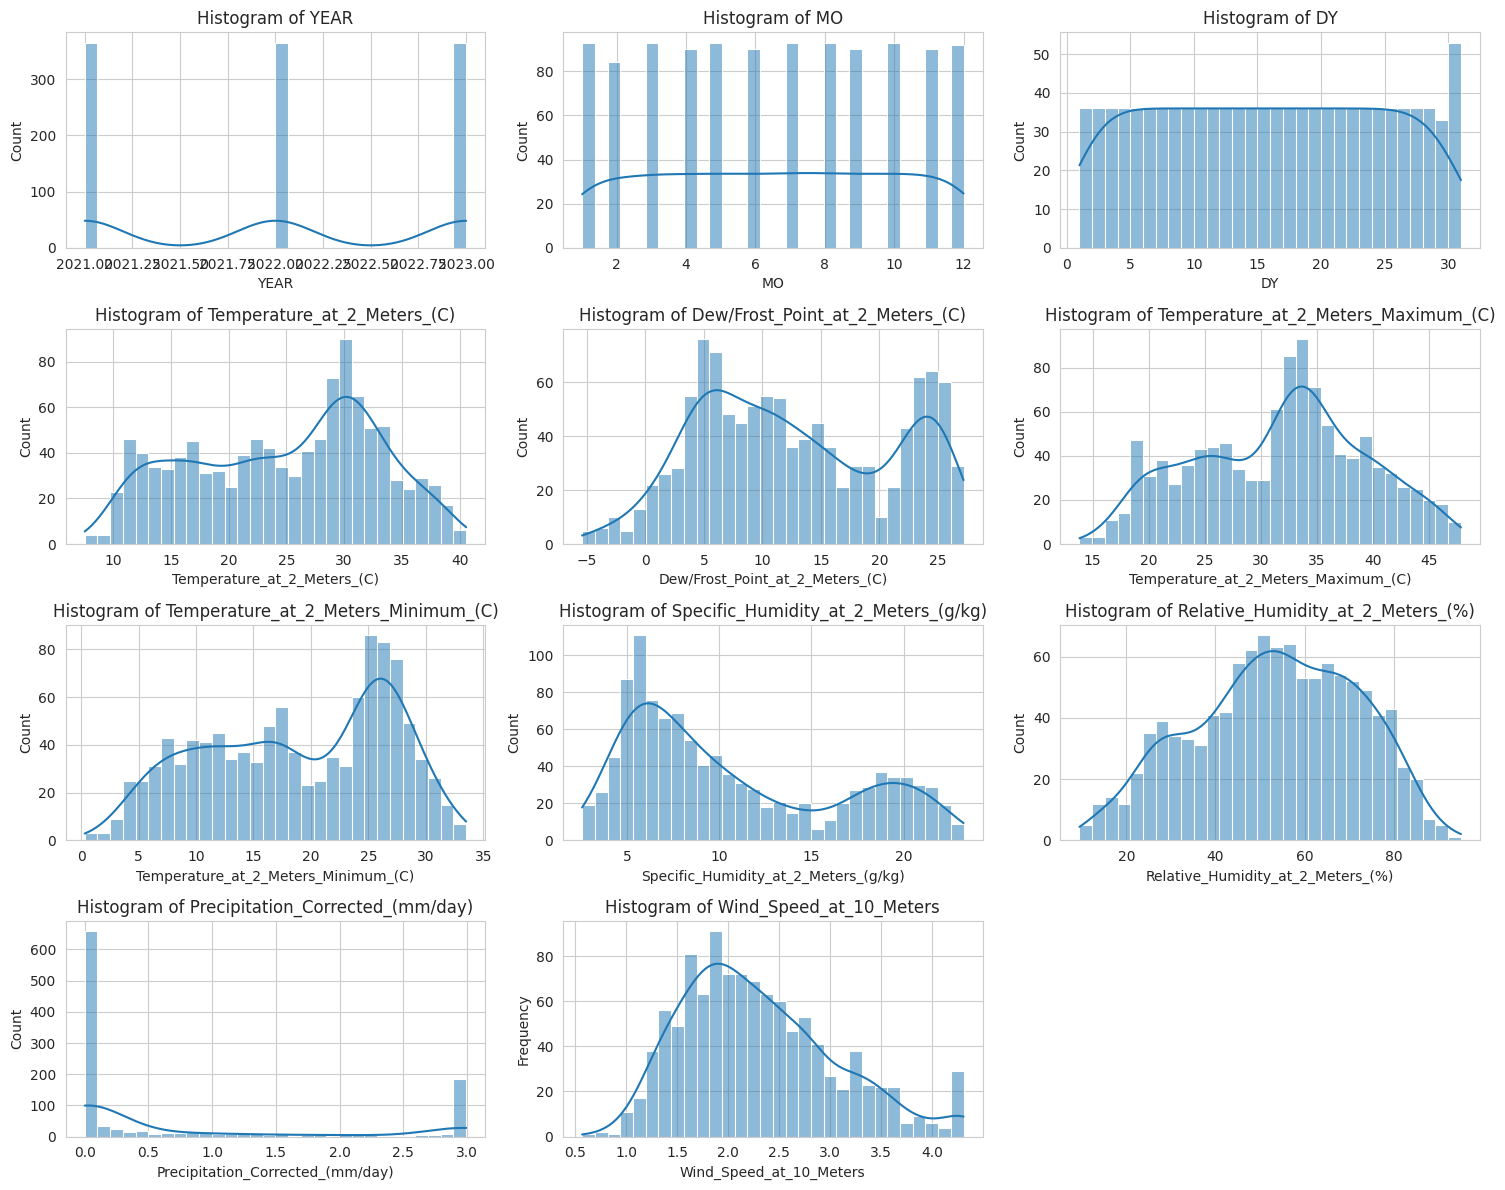

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.xlabel(col)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Box Plot**

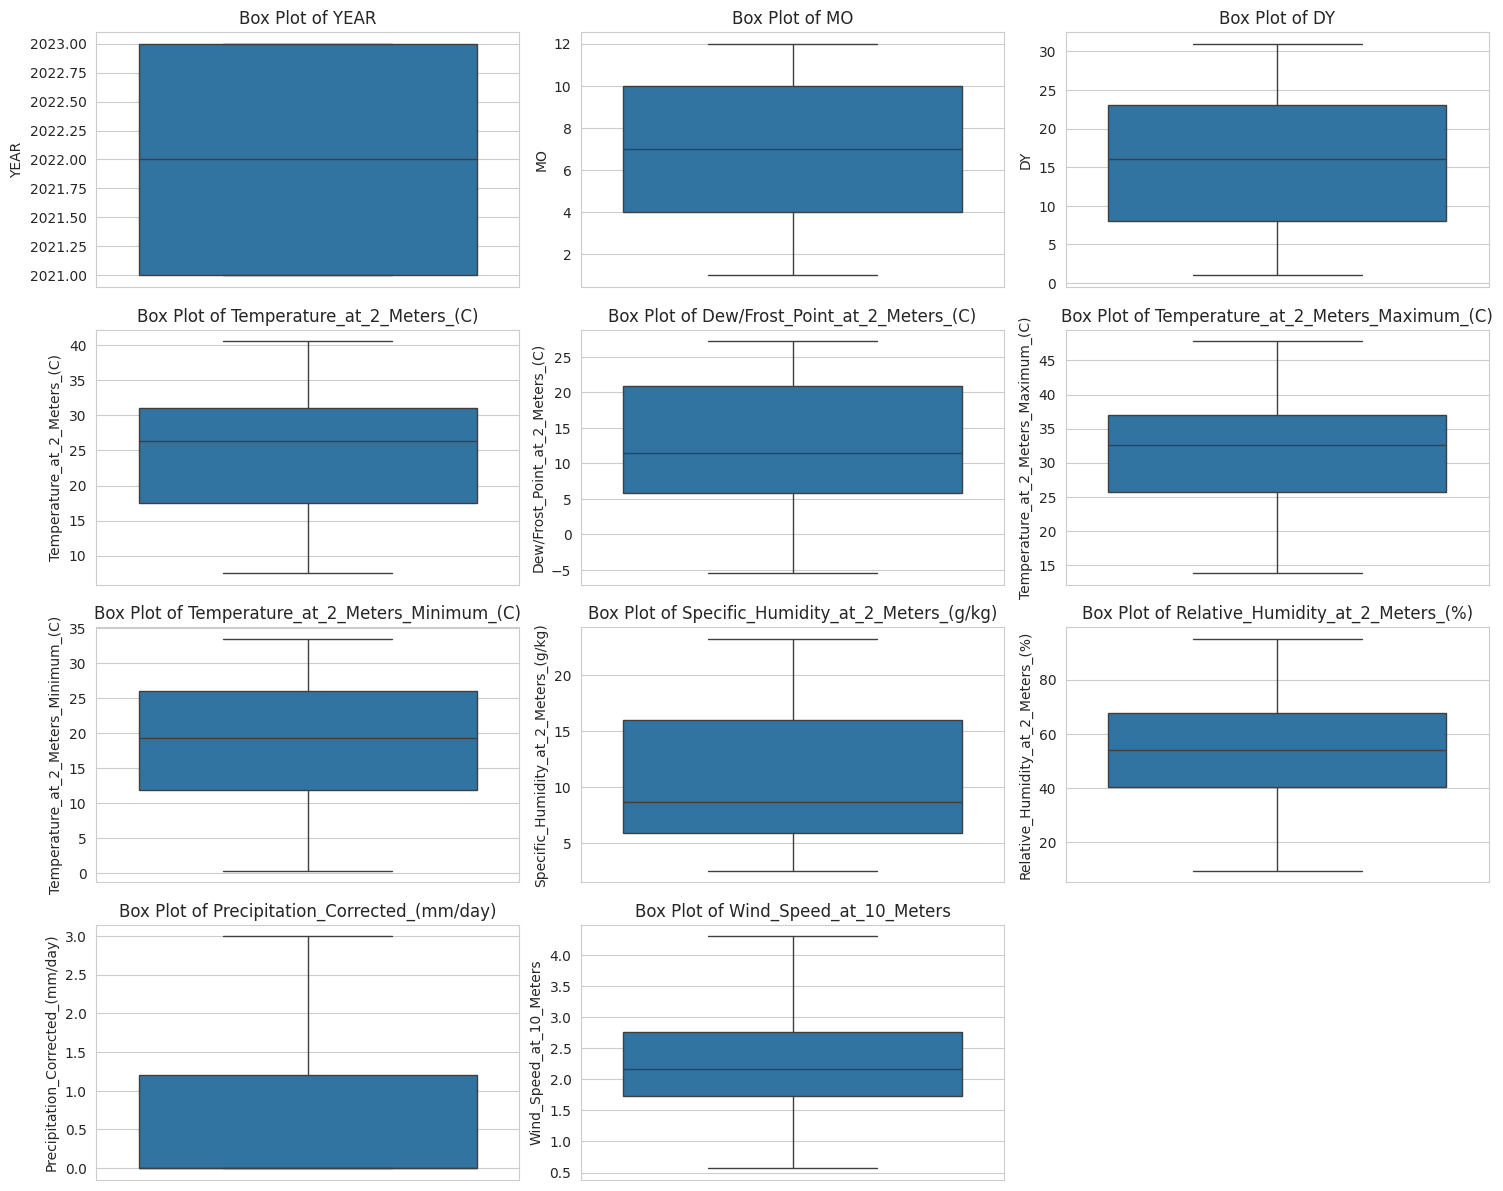

In [ ]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

**Bar Chart**

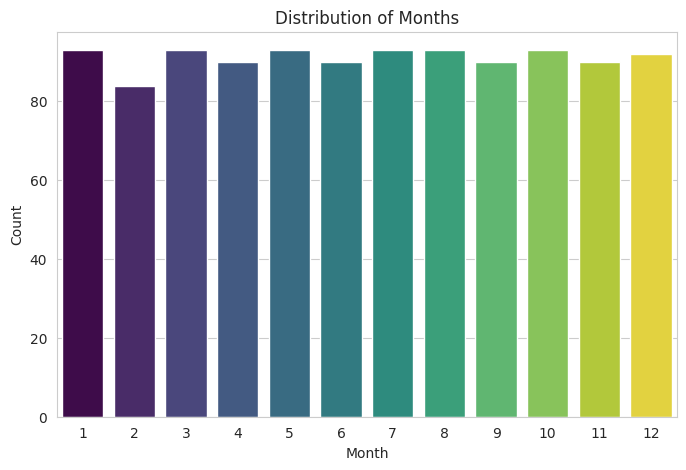

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["MO"], hue=df["MO"], palette="viridis", legend=False)
plt.title("Distribution of Months")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

### Bivariate and Multivariate


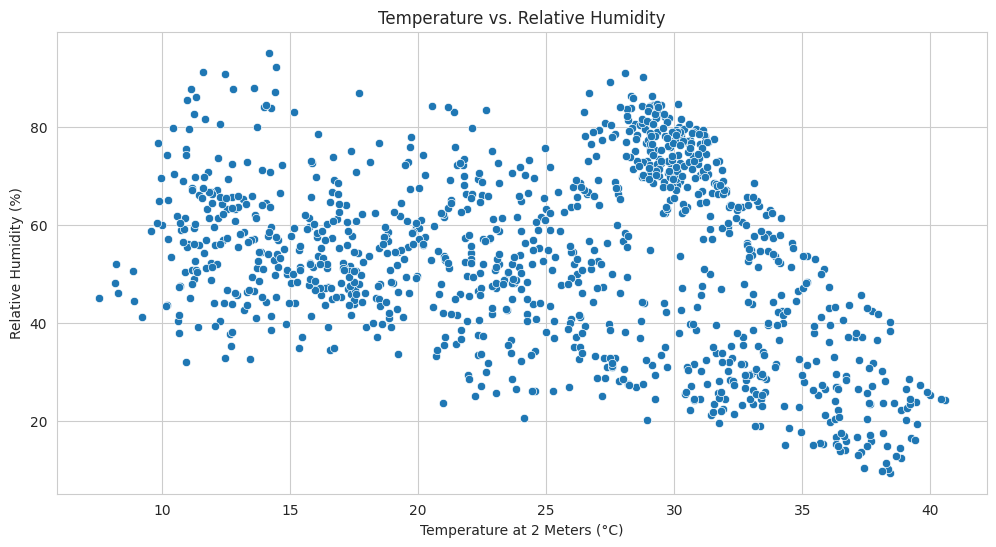

In [ ]:
# Clean and rename columns to simpler versions
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("©", "")

# Print to confirm
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Temperature_at_2_Meters_C'], y=df['Relative_Humidity_at_2_Meters_%'])
plt.title("Temperature vs. Relative Humidity")
plt.xlabel("Temperature at 2 Meters (°C)")
plt.ylabel("Relative Humidity (%)")
plt.show()


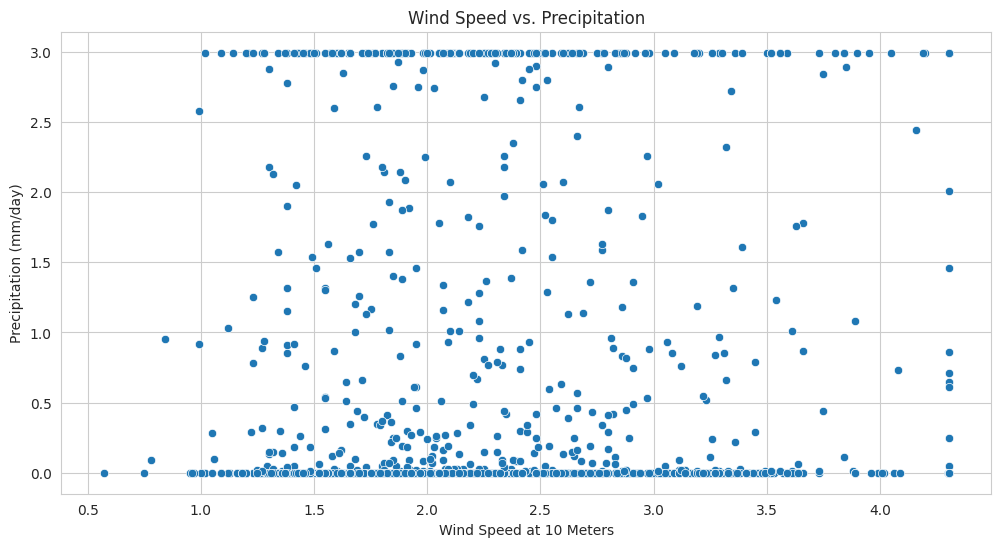

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Wind_Speed_at_10_Meters'], y=df['Precipitation_Corrected_mm/day'])
plt.title("Wind Speed vs. Precipitation")
plt.xlabel("Wind Speed at 10 Meters")
plt.ylabel("Precipitation (mm/day)")
plt.show()


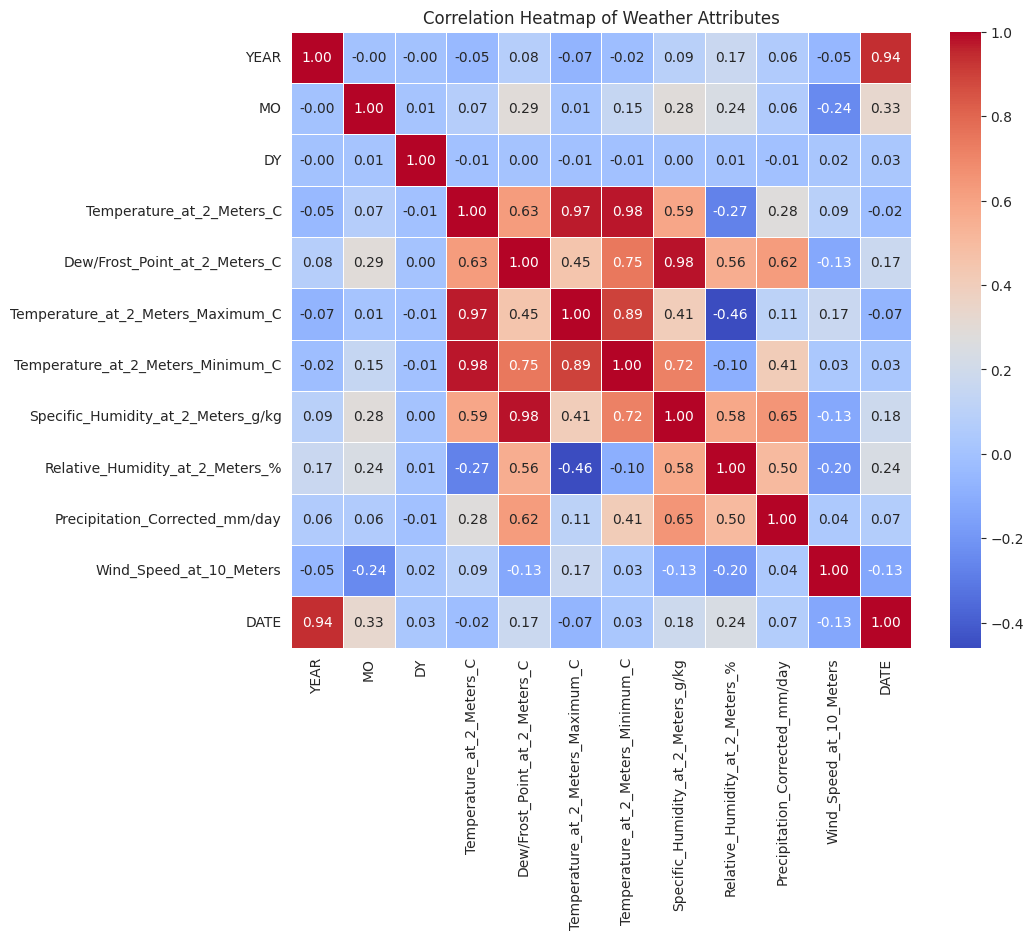

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Weather Attributes")
plt.show()


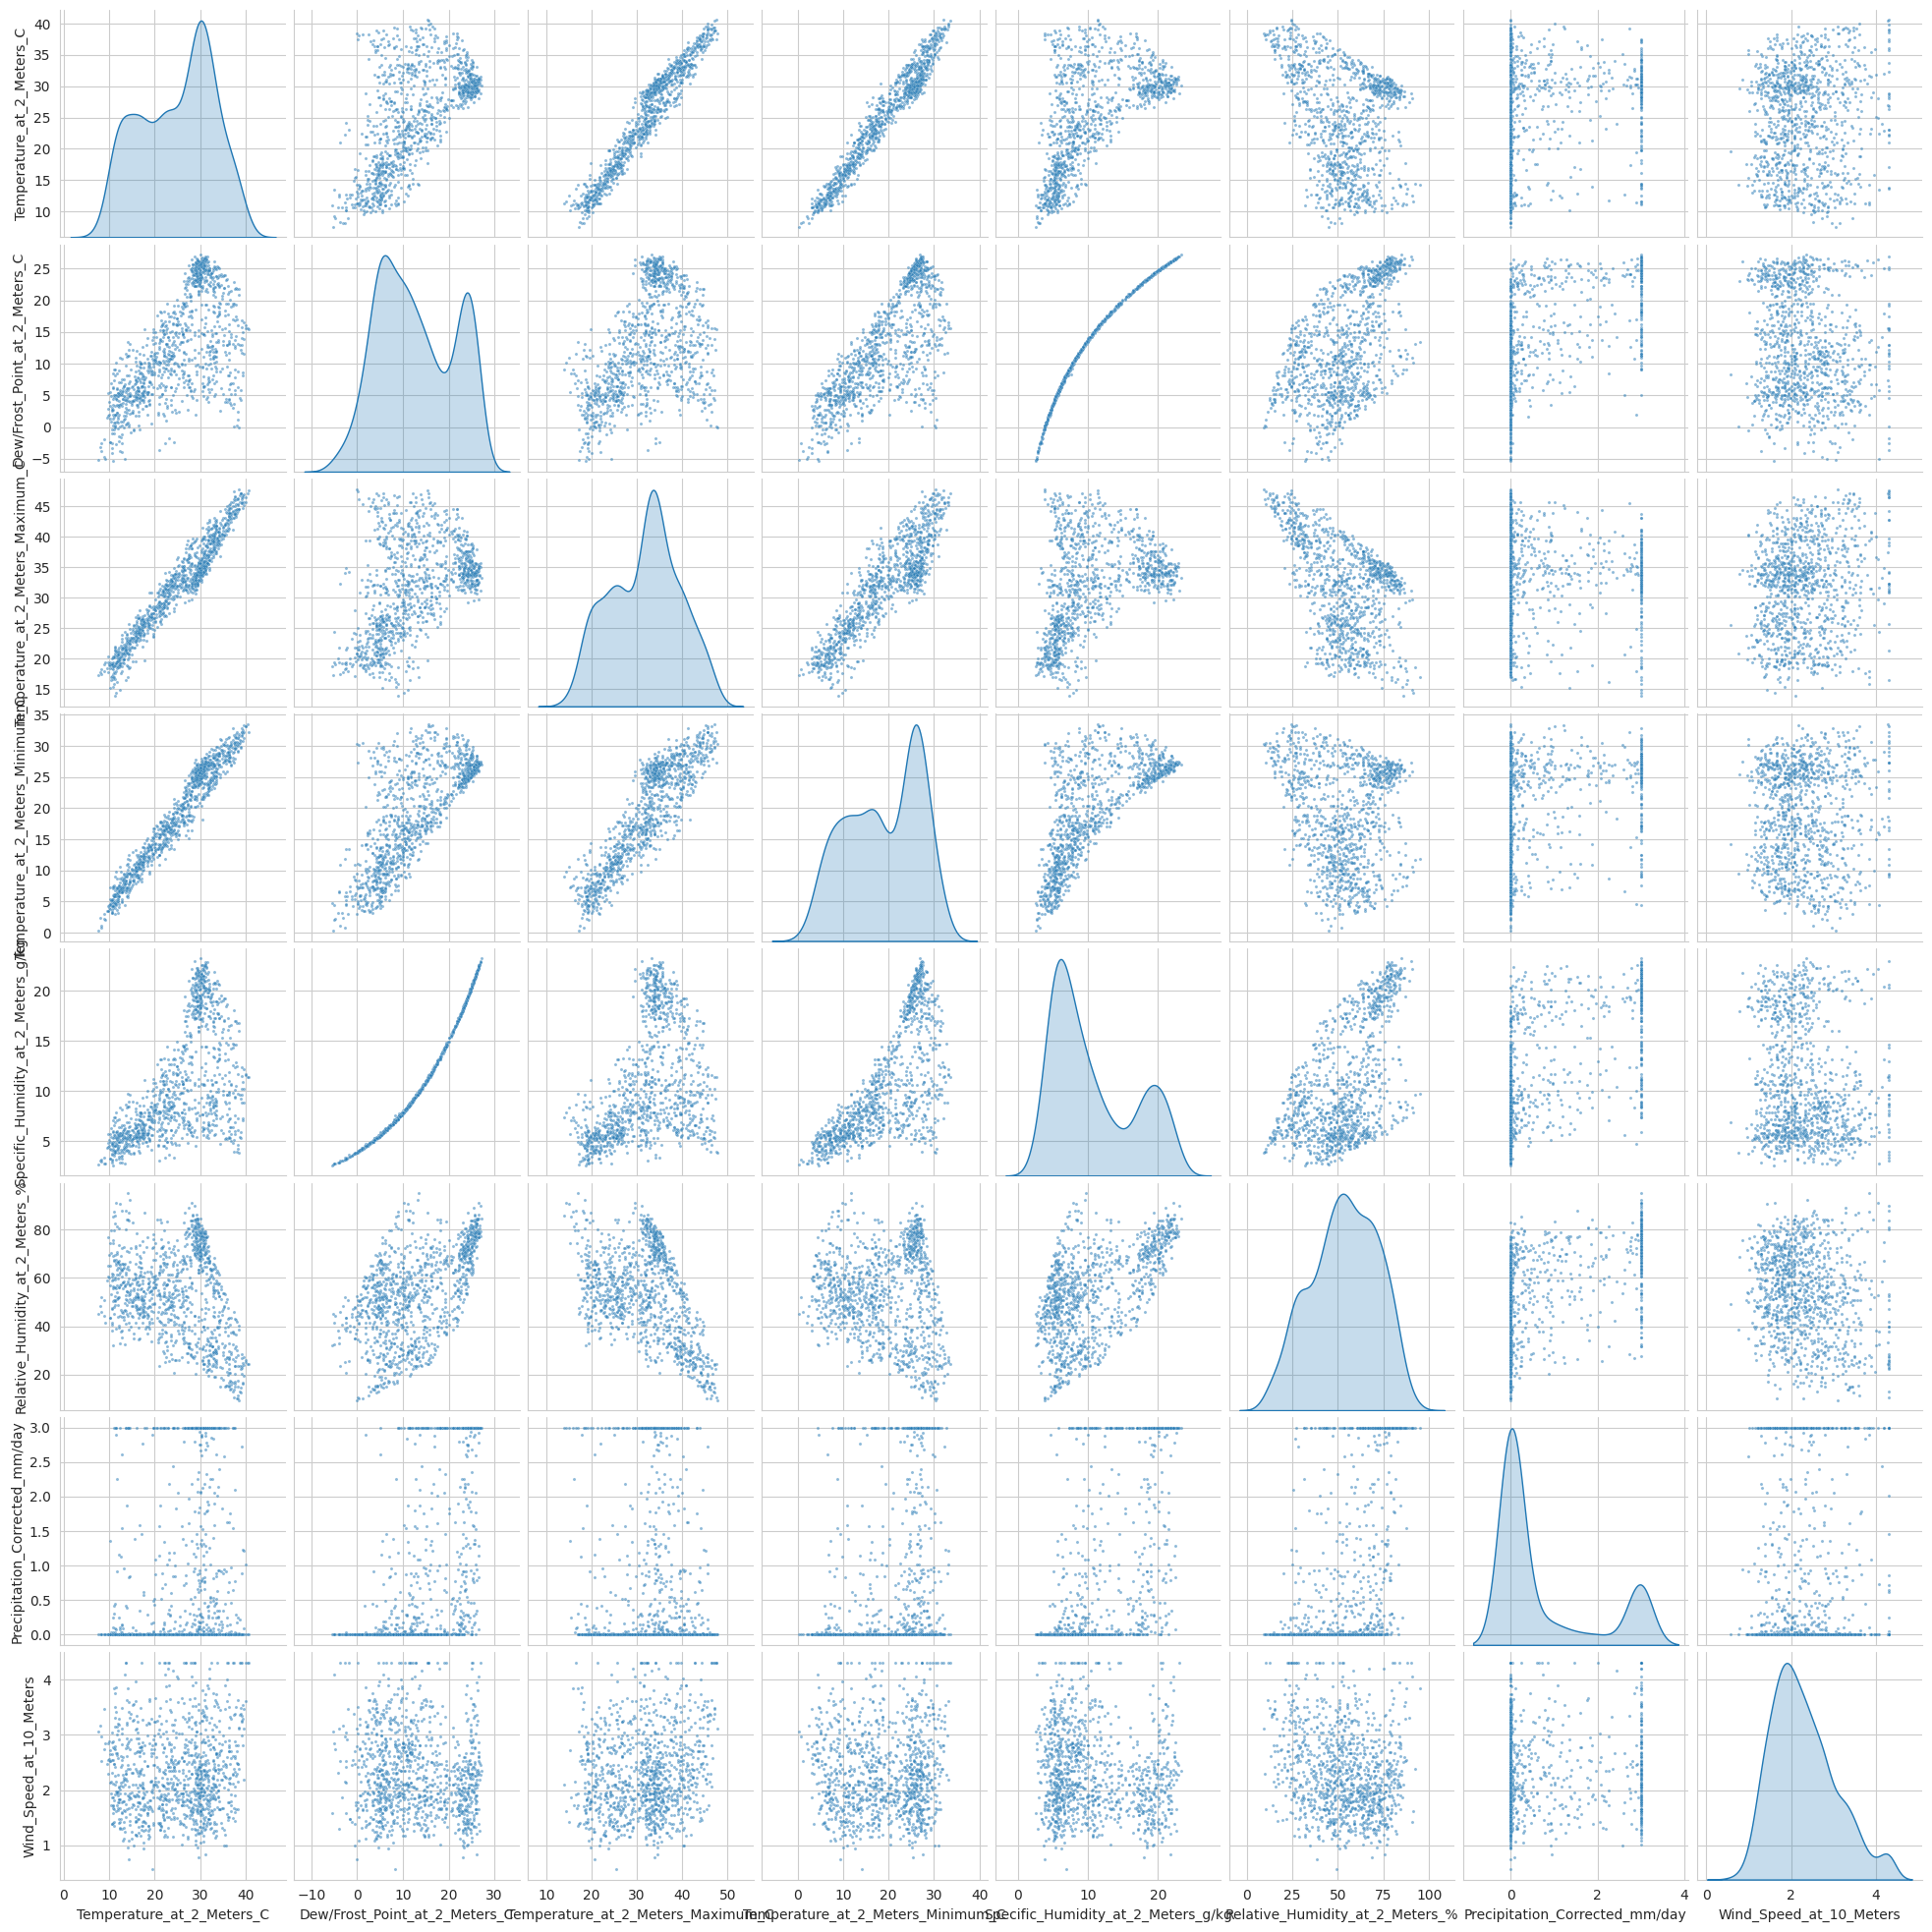

In [ ]:
sns.pairplot(df[[
    'Temperature_at_2_Meters_C',
    'Dew/Frost_Point_at_2_Meters_C',
    'Temperature_at_2_Meters_Maximum_C',
    'Temperature_at_2_Meters_Minimum_C',
    'Specific_Humidity_at_2_Meters_g/kg',
    'Relative_Humidity_at_2_Meters_%',
    'Precipitation_Corrected_mm/day',
    'Wind_Speed_at_10_Meters'
]],
    diag_kind="kde", plot_kws={'alpha': 0.5, 's': 5}
)
plt.show()


# Model Training

###Feature Analysis


**Feature Correlation with Target**

<ipython-input-24-80bb10e58eb0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")


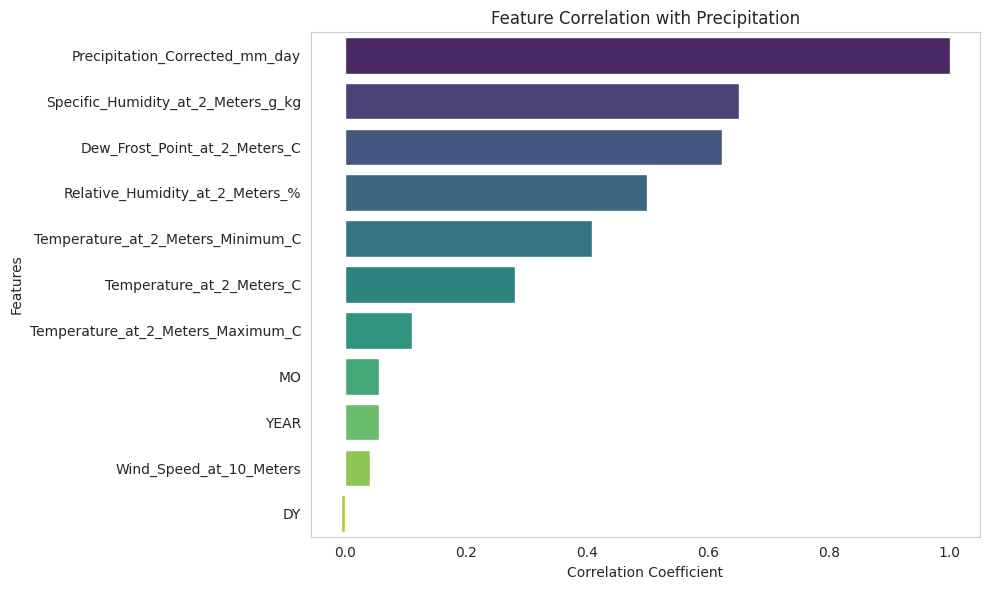

,Precipitation_Corrected_mm_day
Precipitation_Corrected_mm_day,1.000000
Specific_Humidity_at_2_Meters_g_kg,0.650747
Dew_Frost_Point_at_2_Meters_C,0.623832
Relative_Humidity_at_2_Meters_%,0.500016
Temperature_at_2_Meters_Minimum_C,0.408828
Temperature_at_2_Meters_C,0.280670
Temperature_at_2_Meters_Maximum_C,0.110359
MO,0.056569
YEAR,0.055557
Wind_Speed_at_10_Meters,0.040264


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_").str.replace("(", "").str.replace(")", "")

target = "Precipitation_Corrected_mm_day"

# Correlation with target
correlation_with_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")
plt.title("Feature Correlation with Precipitation")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

correlation_with_target


**Group-wise Summary for Categorical Features**

<ipython-input-25-d04404500575>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MO", y=target, data=monthly_precip, palette="viridis")


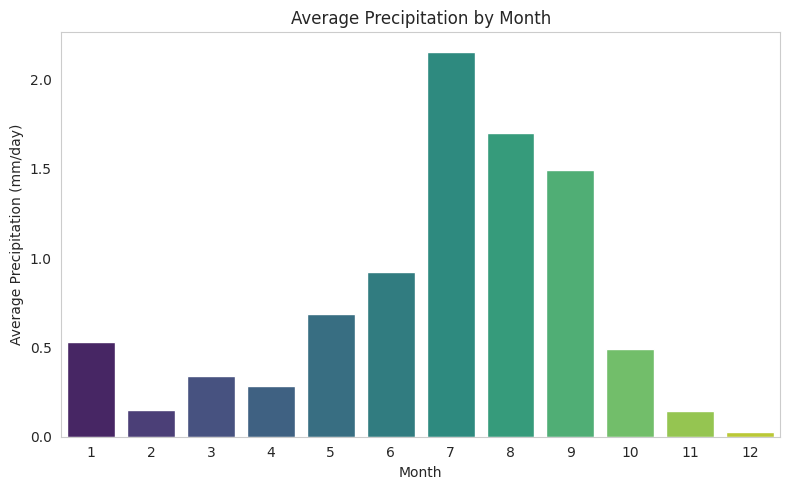

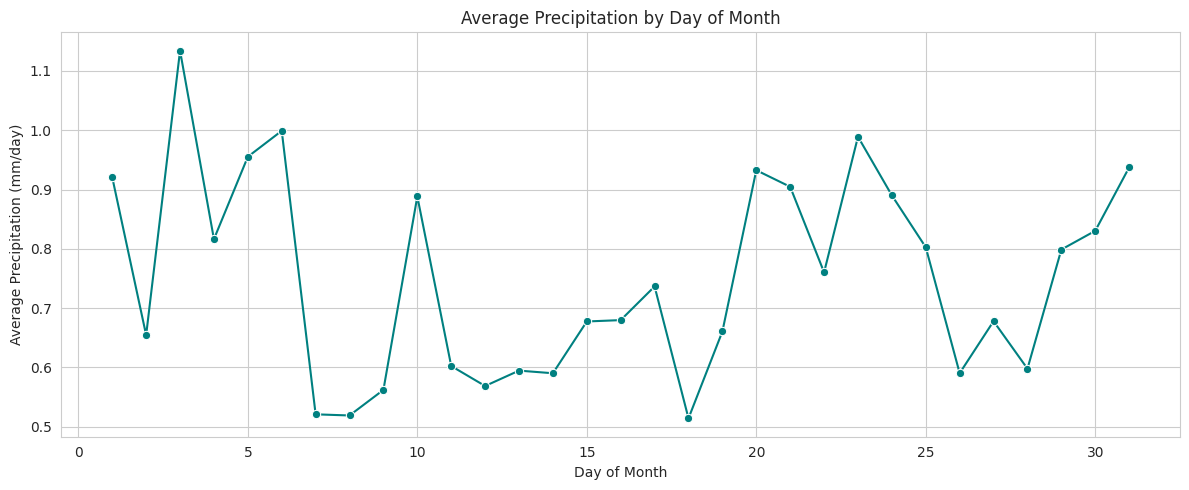

<ipython-input-25-d04404500575>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YEAR", y=target, data=yearly_precip, palette="coolwarm")


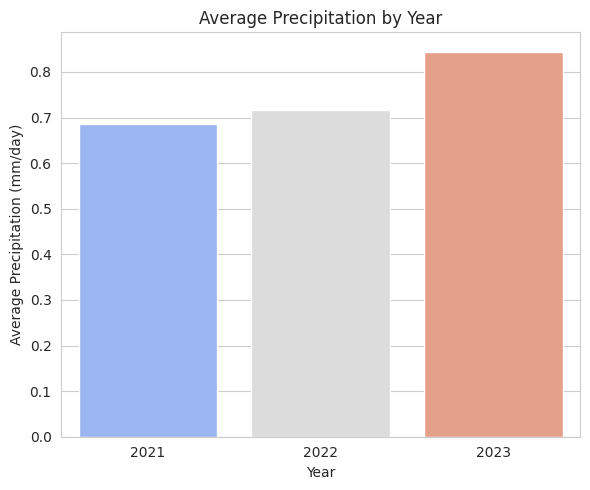

(    Precipitation_Corrected_mm_day
 MO                                
 1                         0.527500
 2                         0.150565
 3                         0.340457
 4                         0.285125
 5                         0.685027
 6                         0.919417
 7                         2.155215
 8                         1.701169
 9                         1.489833
 10                        0.491277
 11                        0.144014
 12                        0.025761,
     Precipitation_Corrected_mm_day
 DY                                
 1                         0.920660
 2                         0.654583
 3                         1.134201
 4                         0.816424
 5                         0.955382
 6                         0.999097
 7                         0.520972
 8                         0.519028
 9                         0.562187
 10                        0.888403
 11                        0.602465
 12                        

In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_").str.replace("(", "").str.replace(")", "")

target = "Precipitation_Corrected_mm_day"

monthly_precip = df.groupby("MO")[target].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="MO", y=target, data=monthly_precip, palette="viridis")
plt.title("Average Precipitation by Month")
plt.xlabel("Month")
plt.ylabel("Average Precipitation (mm/day)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

daily_precip = df.groupby("DY")[target].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x="DY", y=target, data=daily_precip, marker="o", color="teal")
plt.title("Average Precipitation by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Average Precipitation (mm/day)")
plt.grid(True)
plt.tight_layout()
plt.show()

yearly_precip = df.groupby("YEAR")[target].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x="YEAR", y=target, data=yearly_precip, palette="coolwarm")
plt.title("Average Precipitation by Year")
plt.xlabel("Year")
plt.ylabel("Average Precipitation (mm/day)")
plt.tight_layout()
plt.show()

monthly_precip.set_index("MO"), daily_precip.set_index("DY"), yearly_precip.set_index("YEAR")


**Feature Selection – Multicollinearity Check**

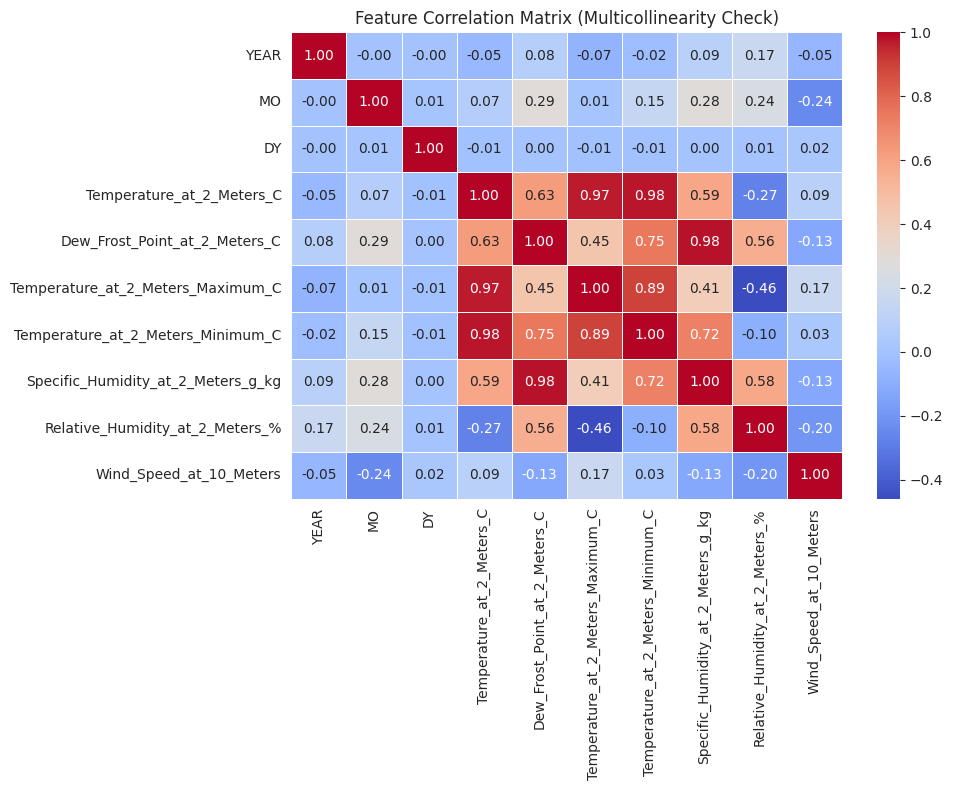

,Feature,VIF
0,Temperature_at_2_Meters_C,3669.851530
1,Temperature_at_2_Meters_Maximum_C,1806.955548
2,Temperature_at_2_Meters_Minimum_C,770.032911
3,YEAR,570.122631
4,Relative_Humidity_at_2_Meters_%,236.149451
5,Dew_Frost_Point_at_2_Meters_C,189.356141
6,Specific_Humidity_at_2_Meters_g_kg,120.724581
7,Wind_Speed_at_10_Meters,13.220424
8,MO,5.851163
9,DY,4.204565


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_").str.replace("(", "").str.replace(")", "")

target = "Precipitation_Corrected_mm_day"

numerical_features = df.select_dtypes(include=["float64", "int64"]).drop(columns=[target])
X = numerical_features.copy()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix (Multicollinearity Check)")
plt.tight_layout()
plt.show()

# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

vif_data

### **Feature Importance via Random Forest**

<ipython-input-27-fe16d6f3953f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


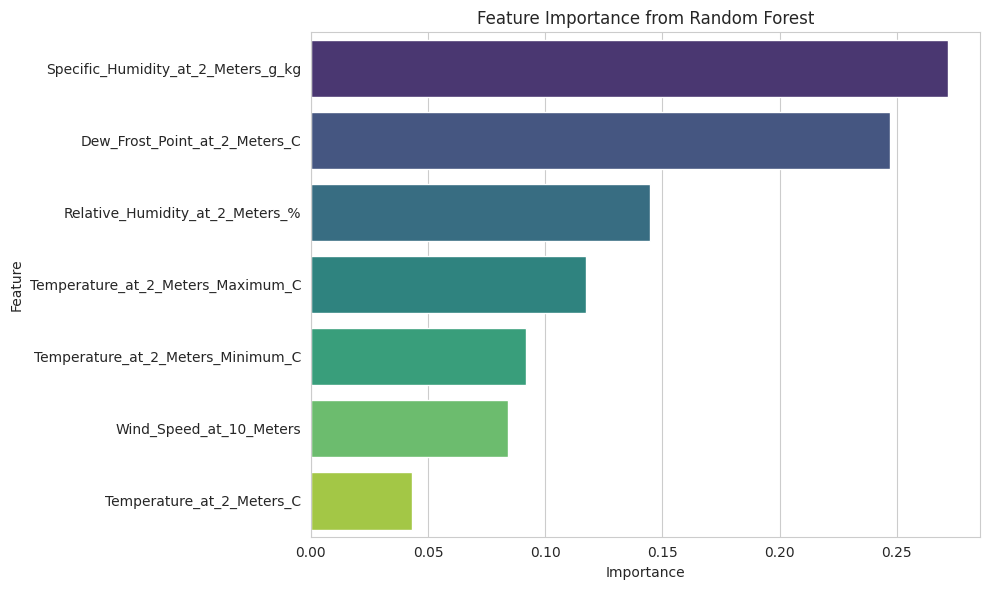

,Feature,Importance
4,Specific_Humidity_at_2_Meters_g_kg,0.271899
1,Dew_Frost_Point_at_2_Meters_C,0.246988
5,Relative_Humidity_at_2_Meters_%,0.144763
2,Temperature_at_2_Meters_Maximum_C,0.117321
3,Temperature_at_2_Meters_Minimum_C,0.091931
6,Wind_Speed_at_10_Meters,0.084150
0,Temperature_at_2_Meters_C,0.042949


In [ ]:
from sklearn.ensemble import RandomForestRegressor
importances_df = pd.DataFrame()

# Use the cleaned (non-standardized) dataset
X = df.drop(columns=['Precipitation_Corrected_mm_day', 'DATE', 'YEAR', 'MO', 'DY'])
y = df['Precipitation_Corrected_mm_day']


# Train a basic Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

importances_df

**PCA for Redundancy Check**

Original features: 7
PCA components needed for 95% variance: 3


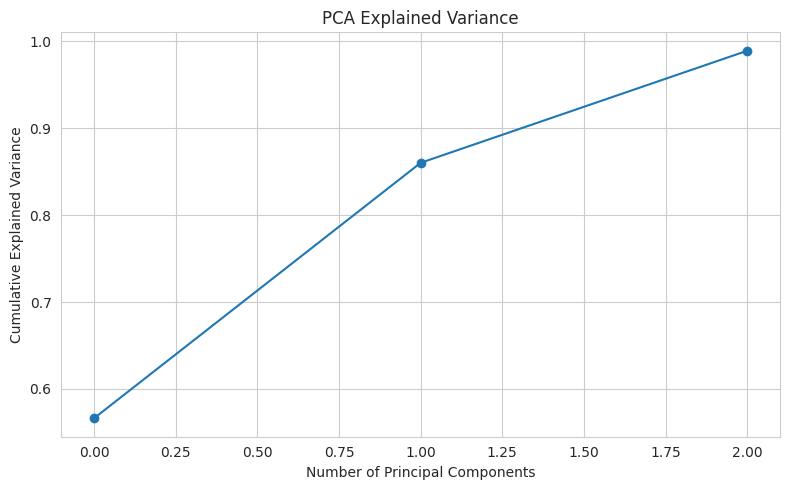

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print(f'Original features: {X.shape[1]}')
print(f'PCA components needed for 95% variance: {X_pca.shape[1]}')

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Basic ML Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select top features from importance (e.g., top 5)
selected_features = importances_df['Feature'].head(5).tolist()
X_selected = df[selected_features]
y = df['Precipitation_Corrected_mm_day']  # Corrected column name

# Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Basic evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Random Forest RMSE: 0.787
R² Score: 0.535




### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Use selected features (already selected by Teammate 1)
selected_features = [
    'Specific_Humidity_at_2_Meters_(g/kg)',
    'Relative_Humidity_at_2_Meters_(%)',
    'Temperature_at_2_Meters_(C)',
    'Dew/Frost_Point_at_2_Meters_(C)',
    'Temperature_at_2_Meters_Minimum_(C)'
]

target = 'Precipitation_Corrected_(mm/day)'


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Run grid search
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Predict with best model
y_pred_rf = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse ** 0.5

r2_rf = r2_score(y_test, y_pred_rf)

print(f"Tuned Random Forest RMSE: {rmse_rf:.4f}")
print(f"Tuned Random Forest R²: {r2_rf:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest RMSE: 0.7596
Tuned Random Forest R²: 0.5668


###Deep Learning Model

In [ ]:
df = pd.read_csv('/content/preprocessed_weather_data.csv')
print(df.columns)


Index(['YEAR', 'MO', 'DY', 'Temperature_at_2_Meters_(C)',
       'Dew/Frost_Point_at_2_Meters_(C)',
       'Temperature_at_2_Meters_Maximum_(C)',
       'Temperature_at_2_Meters_Minimum_(C)',
       'Specific_Humidity_at_2_Meters_(g/kg)',
       'Relative_Humidity_at_2_Meters_(%)', 'Precipitation_Corrected_(mm/day)',
       'Wind_Speed_at_10_Meters', 'DATE'],
      dtype='object')


In [ ]:
target = 'Precipitation_Corrected_(mm/day)'
y = df[target]

features = [
    'Specific_Humidity_at_2_Meters_(g/kg)',
    'Relative_Humidity_at_2_Meters_(%)',
    'Temperature_at_2_Meters_(C)',
    'Dew/Frost_Point_at_2_Meters_(C)',
    'Temperature_at_2_Meters_Minimum_(C)',
    'Temperature_at_2_Meters_Maximum_(C)',
    'Wind_Speed_at_10_Meters'
]

available_features = [f for f in features if f in df.columns]
X = df[available_features]

if all(col in X.columns for col in ['Temperature_at_2_Meters_Maximum_(C)', 'Temperature_at_2_Meters_Minimum_(C)']):
    X['Temperature_Range'] = X['Temperature_at_2_Meters_Maximum_(C)'] - X['Temperature_at_2_Meters_Minimum_(C)']

print(f"Features used: {X.columns.tolist()}")


Features used: ['Specific_Humidity_at_2_Meters_(g/kg)', 'Relative_Humidity_at_2_Meters_(%)', 'Temperature_at_2_Meters_(C)', 'Dew/Frost_Point_at_2_Meters_(C)', 'Temperature_at_2_Meters_Minimum_(C)', 'Temperature_at_2_Meters_Maximum_(C)', 'Wind_Speed_at_10_Meters', 'Temperature_Range']


<ipython-input-34-4cee638fdf96>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Temperature_Range'] = X['Temperature_at_2_Meters_Maximum_(C)'] - X['Temperature_at_2_Meters_Minimum_(C)']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
print(f"LSTM input shape: {X_train_lstm.shape}")


LSTM input shape: (929, 1, 8)


In [ ]:
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
lstm_model = build_lstm_model(input_shape)
lstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,713 (123.88 KB)

 Trainable params: 31,681 (123.75 KB)

 Non-trainable params: 32 (128.00 B)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-5, verbose=1)
]

history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1.4091 - val_loss: 1.6941 - learning_rate: 0.0010
Epoch 2/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0162 - val_loss: 1.5220 - learning_rate: 0.0010
Epoch 3/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9129 - val_loss: 1.4346 - learning_rate: 0.0010
Epoch 4/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7221 - val_loss: 1.3505 - learning_rate: 0.0010
Epoch 5/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7867 - val_loss: 1.3311 - learning_rate: 0.0010
Epoch 6/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6902 - val_loss: 1.2970 - learning_rate: 0.0010
Epoch 7/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6989 - val_loss: 1.2361 - learning_rate: 0.0010
Epoch 8/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6843 - val_loss: 1.1086 - learning_rate: 0.0010
Epoch 9/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7523 - val_loss: 1.0763 - learning_rate: 0.0010
Epoch 10/150
47/47

In [ ]:
y_pred_train = lstm_model.predict(X_train_lstm).flatten()
y_pred_test = lstm_model.predict(X_test_lstm).flatten()

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("\n----- LSTM Model Evaluation -----")
print(f"Training set - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Testing set  - RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

----- LSTM Model Evaluation -----
Training set - RMSE: 0.7175, MAE: 0.4494, R²: 0.6200
Testing set  - RMSE: 0.6515, MAE: 0.4139, R²: 0.6861


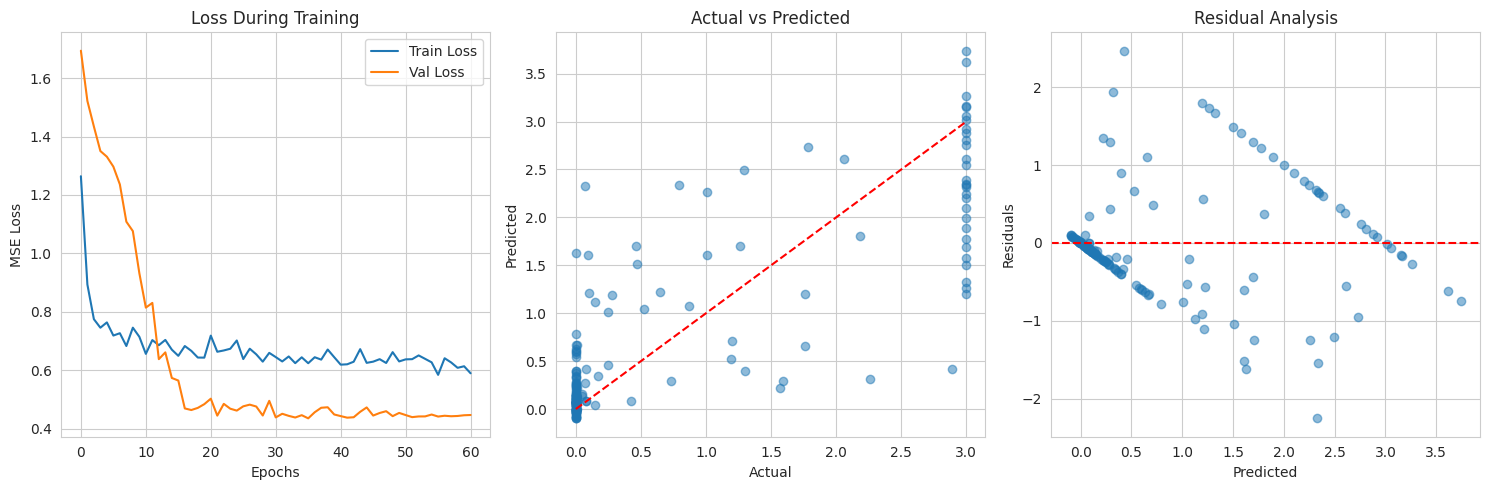

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 3, 3)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True)

plt.tight_layout()
plt.savefig('lstm_model_evaluation_plots.png')
plt.show()



----- LSTM Hyperparameter Tuning -----

Testing LSTM parameter set 1:
  LSTM Units: [96, 48], Dropout: 0.25, LR: 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
  - RMSE: 0.6573, R²: 0.6805

Testing LSTM parameter set 2:
  LSTM Units: [64, 64], Dropout: 0.2, LR: 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
  - RMSE: 0.6518, R²: 0.6858

Testing LSTM parameter set 3:
  LSTM Units: [64, 32, 16], Dropout: 0.2, LR: 0.0005


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
  - RMSE: 0.6478, R²: 0.6897

LSTM Hyperparameter Tuning Results (sorted by R²):
   Param Set    LSTM Units  Dropout  Learning Rate  Batch Size      RMSE  \
2          3  [64, 32, 16]     0.20         0.0005          16  0.647816   
1          2      [64, 64]     0.20         0.0001          32  0.651804   
0          1      [96, 48]     0.25         0.0001          16  0.657336   

         R²  
2  0.689665  
1  0.685833  
0  0.680477  

----- Training Final LSTM Model with Best Hyperparameters -----
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 1.4925 - val_loss: 1.8974 - learning_rate: 5.0000e-04
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1389 - val_loss: 1.7037 - learning_rate: 5.0000e-04
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9513 - val_loss: 1.5679 - learning_rate: 5.0000e-04
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8052 - val_loss: 1.4557 - learning_rate: 5.0000e-04
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7035 - val_loss: 1.3550 - learning_rate: 5.0000e-04
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7063 - val_loss: 1.3332 - learning_rate: 5.0000e-04
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7634 - val_loss: 1.2567 - learning_rate: 5.0000e-04
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7496 - val_loss: 1.1632 - learning_rate: 5.0000e-04
Epoch 9/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7847 - val_loss: 1.0591 - learning_rate: 5.000

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step

Final LSTM Model Performance:
RMSE: 0.6467
MAE: 0.4023
R²: 0.6908


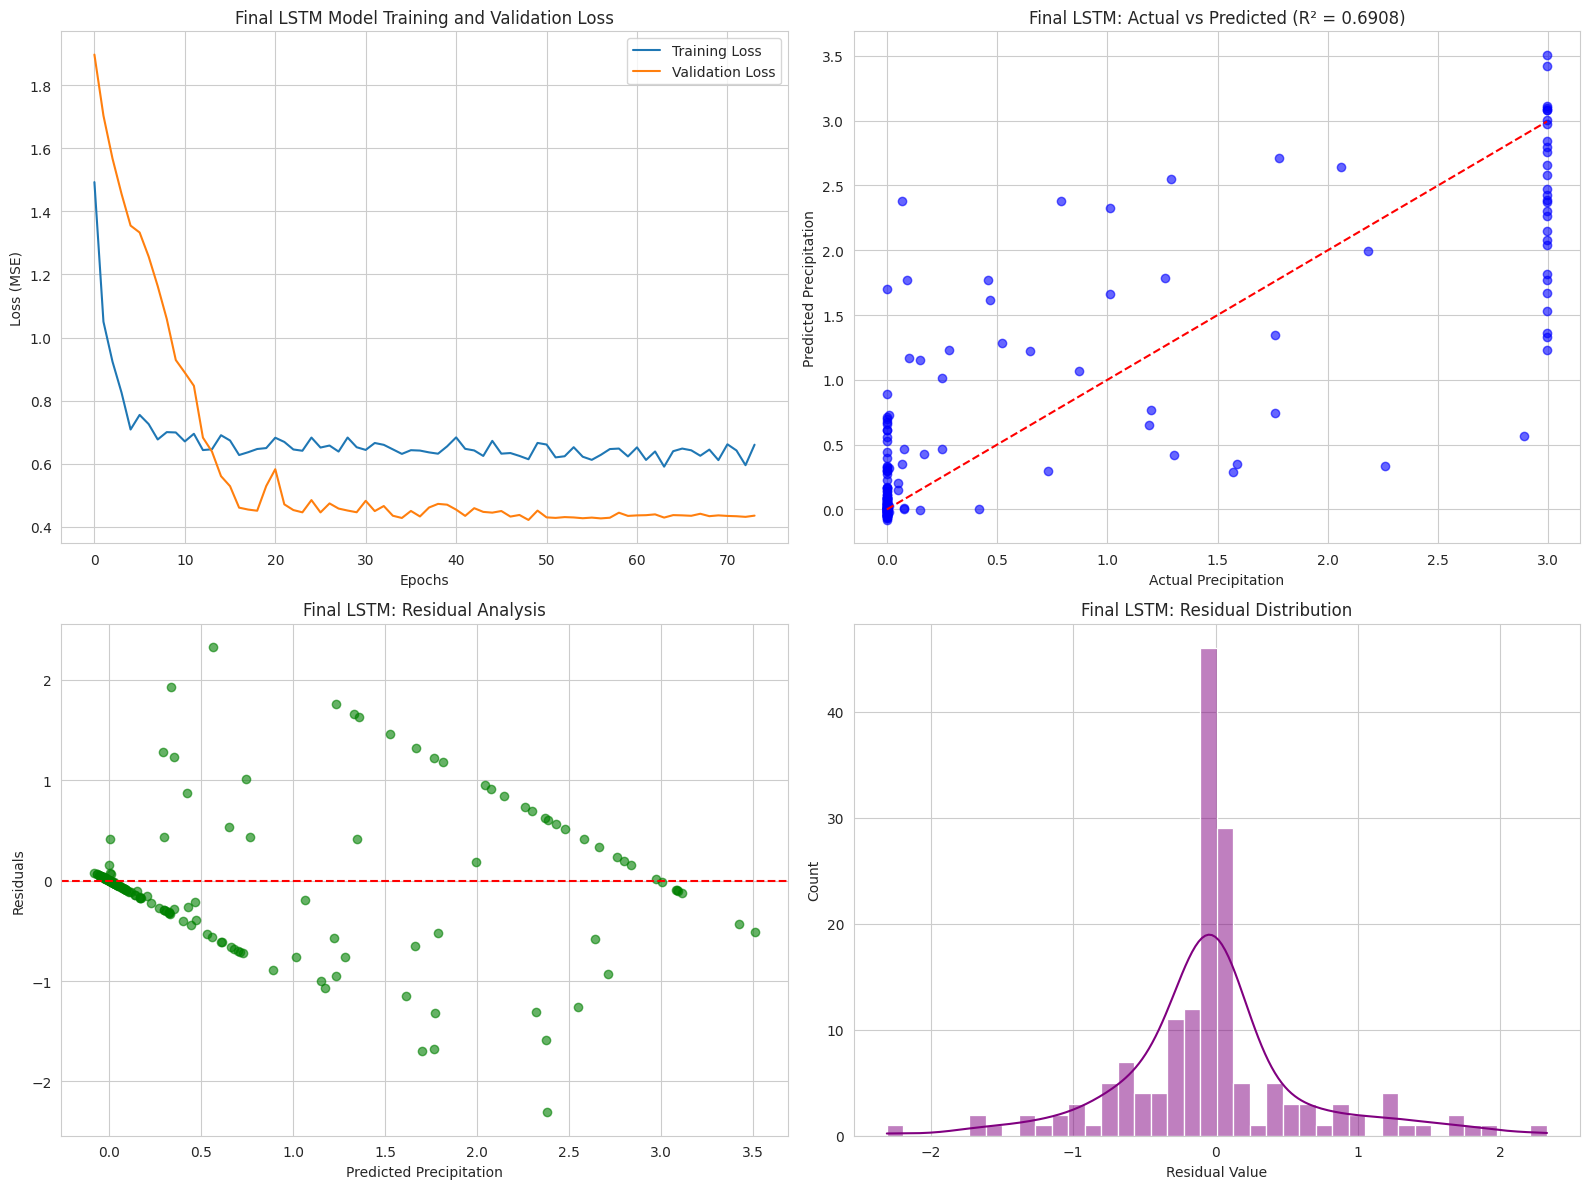


LSTM Model saved as 'precipitation_lstm_model.h5'
Scaler saved as 'precipitation_lstm_scaler.pkl'

These files can be used for application development.


In [ ]:

print("\n----- LSTM Hyperparameter Tuning -----")

lstm_params = [

    {'lstm_units': [96, 48], 'dropout': 0.25, 'learning_rate': 0.0001, 'batch_size': 16},

    {'lstm_units': [64, 64], 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32},

    {'lstm_units': [64, 32, 16], 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 16}
]

results = []


for i, params in enumerate(lstm_params):
    print(f"\nTesting LSTM parameter set {i+1}:")
    print(f"  LSTM Units: {params['lstm_units']}, Dropout: {params['dropout']}, LR: {params['learning_rate']}")


    model = Sequential()


    model.add(LSTM(params['lstm_units'][0],
                  input_shape=input_shape,
                  return_sequences=len(params['lstm_units']) > 1))
    model.add(Dropout(params['dropout']))

    for j in range(1, len(params['lstm_units'])):
        return_seq = j < len(params['lstm_units']) - 1
        model.add(LSTM(params['lstm_units'][j], return_sequences=return_seq))
        model.add(Dropout(params['dropout']))


    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))

    # Output layer
    model.add(Dense(1))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='mean_squared_error'
    )

    # Set callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=0.00001, verbose=0)
    ]

    # Train model
    history = model.fit(
        X_train_lstm, y_train,
        epochs=150,
        batch_size=params['batch_size'],
        validation_split=0.2,
        callbacks=callbacks,
        verbose=0
    )

    # Evaluate model
    y_pred = model.predict(X_test_lstm).flatten()
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    results.append({
        'Param Set': i+1,
        'LSTM Units': str(params['lstm_units']),
        'Dropout': params['dropout'],
        'Learning Rate': params['learning_rate'],
        'Batch Size': params['batch_size'],
        'RMSE': test_rmse,
        'R²': test_r2
    })

    print(f"  - RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")


results_df = pd.DataFrame(results)
print("\nLSTM Hyperparameter Tuning Results (sorted by R²):")
print(results_df.sort_values('R²', ascending=False))


best_params = lstm_params[results_df['R²'].idxmax()]


print("\n----- Training Final LSTM Model with Best Hyperparameters -----")


final_model = Sequential()

final_model.add(LSTM(best_params['lstm_units'][0],
              input_shape=input_shape,
              return_sequences=len(best_params['lstm_units']) > 1))
final_model.add(Dropout(best_params['dropout']))


for j in range(1, len(best_params['lstm_units'])):
    return_seq = j < len(best_params['lstm_units']) - 1
    final_model.add(LSTM(best_params['lstm_units'][j], return_sequences=return_seq))
    final_model.add(Dropout(best_params['dropout']))

final_model.add(Dense(16, activation='relu'))
final_model.add(BatchNormalization())
final_model.add(Dropout(best_params['dropout']))


final_model.add(Dense(1))


final_model.compile(
    optimizer=Adam(learning_rate=best_params['learning_rate']),
    loss='mean_squared_error'
)


final_callbacks = [
    EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001, verbose=1)
]


final_history = final_model.fit(
    X_train_lstm, y_train,
    epochs=200,
    batch_size=best_params['batch_size'],
    validation_split=0.2,
    callbacks=final_callbacks,
    verbose=1
)


y_pred_final = final_model.predict(X_test_lstm).flatten()
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print("\nFinal LSTM Model Performance:")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE: {final_mae:.4f}")
print(f"R²: {final_r2:.4f}")


plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Final LSTM Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_final, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title(f'Final LSTM: Actual vs Predicted (R² = {final_r2:.4f})')
plt.grid(True)


plt.subplot(2, 2, 3)
final_residuals = y_test - y_pred_final
plt.scatter(y_pred_final, final_residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Precipitation')
plt.ylabel('Residuals')
plt.title('Final LSTM: Residual Analysis')
plt.grid(True)


plt.subplot(2, 2, 4)
sns.histplot(final_residuals, kde=True, color='purple')
plt.title('Final LSTM: Residual Distribution')
plt.xlabel('Residual Value')
plt.grid(True)

plt.tight_layout()
plt.savefig('final_lstm_model_performance.png')
plt.show()

final_model.save('precipitation_lstm_model.h5')
import joblib
joblib.dump(scaler, 'precipitation_lstm_scaler.pkl')

print("\nLSTM Model saved as 'precipitation_lstm_model.h5'")
print("Scaler saved as 'precipitation_lstm_scaler.pkl'")
print("\nThese files can be used for application development.")

In [ ]:


# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    model.add(LSTM(units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=32),
                   input_shape=input_shape,
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))


    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))


    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    model.add(Dense(1))


    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=0.0001, max_value=0.001, sampling='LOG')),
                  loss='mean_squared_error')

    return model


tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=0)
]


tuner.search(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=callbacks)


best_model = tuner.get_best_models(num_models=1)[0]


y_pred = best_model.predict(X_test_lstm).flatten()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f"Best model RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")


best_model.save('best_lstm_model.h5')


Trial 10 Complete [00h 00m 20s]
val_loss: 0.4733527898788452

Best val_loss So Far: 0.4287565052509308
Total elapsed time: 00h 03m 28s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


Best model RMSE: 0.6406, R²: 0.6966
